<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

**The aim of this study is to determine whether the ACT or the SAT scores have good predictive validity?** 


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Therefore, the aim of this data analysis is to determine if both SAT and ACT scores have good predictive validity. Predictive validity is the measure in which test scores predict an outcome criteria. In this case, do SAT and ACT scores predict academic success in college students? 

College grade point average(GPA) is calculated by using the number of grade points a student earns in a given period of semester or year in college. 

### Data

**Provided data of SAT and ACT Scores:** 
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
<br> These will be used to provide general description of SAT and ACT scores.

**Other data used to determine the predictive validity of ACT and SAT Scores** 
* [`act_sat_by college_older.csv`](./data/act_sat_by_college_older.csv): College Scorecard([source](https://collegescorecard.ed.gov/data/))
<br> These are aggregate data by college for 1996-97 through 2019-20. It includes information on institutional characteristics, admissions, enrollment, etc.
* [`college_GPA.csv`](./data/college_GPA.xlsx): gradeinflation ([source](https://www.gradeinflation.com/))
<br> These are average undergraduate college GPAs for four-year American universities/colleges from 2002-2015. There is the assumption here that colleges were truthful when reporting their GPAs.  

### Outside Research

**To-Do:**
"ACT scores are highly predictive of success in college," said Colby. "They provide colleges with a standardized measure of academic readiness that can be used to compare students from different schools, districts, and states on an level playing field, something that no other admission factor can provide.“
Colby and White cited a yearlong review done by the University of California's Standardized Testing Task Force that found standardized tests to be the best predictor of a college student's success.

Yet, according to a 2015 analysis by Inside Higher Ed, the lowest average scores for each part of the SAT came from students with less than \\$20,000 in family income. The highest scores came from those with more than \\$200,000 in family income.  
Affected by socioeconomic families - Hispanic and African-American students fair worse than Asian-American and White peers.
Test scores do not correlate to success on campus.


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def calc_mean(num):
    '''returns the average of all numbers in list''' 
    return sum(num) / len(num)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def calc_stdev(num):
    '''returns the spread of numbers in a list relative to its mean'''
    mean = calc_mean(num)
    bracket = 0
    
    for value in num :
        bracket += (value-mean) ** 2

    # returns standard deviation = square root of (bracket/n)
    return (bracket / (len(num))) ** (0.5)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def clean_percent(sym):
    '''Returns the decimal number (float) converted from string with percent symbol'''  
    return float(sym.replace('%',''))/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

Both SAT and ACT scores will be examined as college admissions counselors have openly stated they do not prefer one test over the other. In reality, all colleges and universities which require standardized testing accept both the ACT and SAT scores.

In [5]:
# provided data
sat_2017 = pd.read_csv('../my_project_1/data/sat_2017.csv')
sat_2018 = pd.read_csv('../my_project_1/data/sat_2018.csv')
act_2017 = pd.read_csv('../my_project_1/data/act_2017.csv')
act_2018 = pd.read_csv('../my_project_1/data/act_2018.csv')

In [6]:
# other datasets
entry_scores = pd.read_csv('../my_project_1/data/act_sat_by college_older.csv')
gpa_scores = pd.read_excel('../my_project_1/data/college_GPA.xlsx')

The provided data (below) of SAT and ACT scores by college were not used because the scores were too recent (2020-2021).
<br> This means that the students are most likely going to or starting college, and the college GPA of these students are still unknown.

In [7]:
# a preview of given sat_act_by_college data
sat_act_by_college = pd.read_csv('../my_project_1/data/sat_act_by_college.csv')
sat_act_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


---

### 1. Display the first 5 rows of each dataframe 

In [8]:
# 1. A preview of SAT scores in 2017
sat_2017.head() 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [9]:
# A preview of SAT scores in 2018
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [10]:
# A preview of ACT scores in 2017
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [11]:
# A preview of ACT scores in 2018
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


" .head() " returns first five observations of the dataset
<br> The given SAT data (2017, 2018) had 5 columns
<br> The given ACT data in both 2017 and 2018 were different. 
<br> ACT scores of 2017 and 2018 provided the participation rates by each state. However, ACT data from 2017 provided more detailed scores from all 4 sections (English, Math, Reading, Science), together with the composite score. The composite score in ACT is the average of four test scores, rounded to the nearest whole number. 
<br> ACT data from 2018 only provided the composite scores 

In [12]:
# a preview of other datasets
# a preview of the SAT and ACT scores for admissions by college
entry_scores.head(10)

,INSTNM,CITY,STABBR,ZIP,ADM_RATE,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,...,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL
0,Abilene Christian University,Abilene,TX,79699,0.6148,515.0,630.0,500.0,600.0,450.0,...,18.0,26.0,6.0,8.0,25.0,24.0,22.0,7.0,1164.0,1164.0
1,Abraham Baldwin Agricultural College,Tifton,GA,31793-2601,0.7342,470.0,580.0,460.0,540.0,NaN,...,16.0,21.0,NaN,NaN,20.0,19.0,19.0,NaN,1029.0,1029.0
2,Academy of Interactive Entertainment,Seattle,WA,98109-4623,0.9231,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Academy of Interactive Entertainment,Lafayette,LA,70506-4293,0.8627,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adams State University,Alamosa,CO,81101,0.9909,450.0,550.0,440.0,540.0,NaN,...,16.0,22.0,NaN,NaN,20.0,18.0,19.0,NaN,1003.0,1003.0
5,Adelphi University,Garden City,NY,11530-0701,0.7430,530.0,630.0,530.0,620.0,500.0,...,19.0,26.0,7.0,8.0,24.0,26.0,23.0,8.0,1161.0,1161.0
6,Adrian College,Adrian,MI,49221-2575,0.5593,480.0,580.0,480.0,520.0,NaN,...,17.0,25.0,NaN,NaN,22.0,20.0,21.0,NaN,1046.0,1046.0
7,Adult and Community Education-Hudson,Columbus,OH,43211,1.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Advanced Technology Institute,Virginia Beach,VA,23462,0.4791,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AdventHealth University,Orlando,FL,32803,0.5053,510.0,600.0,510.0,560.0,NaN,...,18.0,21.0,NaN,NaN,20.0,21.0,20.0,NaN,1072.0,1072.0


The admissions scores by college has 28 columns, which includes the ADM_RATE (admissions rate) and the 25th, 50th and 75th quartile of SAT and ACT scores of incoming students. 
<br> There is a lot of missing data in a number of colleges. 

In [13]:
# a review of the college GPA scores by college
gpa_scores.head()

,College,Acceptance Rate,Average GPA,year
0,Adelphi University,NaN,3.22,2004
1,Albion College,NaN,3.29,2008
2,Allegheny College,NaN,3.04,2014
3,Amherst College,NaN,3.48,2006
4,Appalachian State University,NaN,3.10,2013


The gpa_scores reported the average GPA score and the year it was reported or announced (to the public).
<br> There is a lot of missing data in the column reporting the acceptance rate of each college.



---

### 2. Check for missing data

In [14]:
pd.isna(sat_2017).sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [15]:
pd.isna(sat_2018).sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [16]:
pd.isna(act_2017).sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [17]:
pd.isna(act_2018).sum()

State            0
Participation    0
Composite        0
dtype: int64

' .isna' detects missing values in a dataframe, and then ' .sum' is used to count the missing values.
<br> There are no missing values in the given data (SAT and ACT scores in 2017 and 2018).

In [18]:
# check for missing data in other datasets
entry_scores.isna().sum(axis = 0)

INSTNM            0
CITY              0
STABBR            0
ZIP               0
ADM_RATE       4483
SATVR25        5244
SATVR75        5244
SATMT25        5244
SATMT75        5244
SATWR25        5735
SATWR75        5735
SATVRMID       5244
SATMTMID       5244
SATWRMID       5735
ACTCM25        5210
ACTCM75        5210
ACTEN25        5292
ACTEN75        5292
ACTMT25        5292
ACTMT75        5292
ACTWR25        6138
ACTWR75        6138
ACTCMMID       5210
ACTENMID       5292
ACTMTMID       5292
ACTWRMID       6138
SAT_AVG        5184
SAT_AVG_ALL    5034
dtype: int64

As expected, there are many missing values in the entry_scores (SAT and ACT scores by college).

In [19]:
gpa_scores.isna().sum(axis = 0)

College              0
Acceptance Rate    181
Average GPA          0
year                 0
dtype: int64

As expected, there are many missing values in the gpa_scores (college GPA scores by college).

---

### 3. and 4. Check for any obvious issues with the observations and fix those errors 

There are missing data in the entry_scores and gpa_scores datasets. This will be fixed first (as shown below).
<br> Let's fix the entry_scores dataframe first.

In [20]:
entry_scores.shape

(6462, 28)

' .shape' returns the dimensions of the dataframe. So it has 6462 rows and 28 columns. 

In [21]:
entry_scores.columns

Index(['INSTNM', 'CITY', 'STABBR', 'ZIP', 'ADM_RATE', 'SATVR25', 'SATVR75',
       'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID',
       'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25',
       'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID',
       'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL'],
      dtype='object')

' .columns' returns the column labels of the dataframe. In the above, these are the 28 column labels of entry_scores. 
<br> Since there are so many unnecessary columns, they will be removed first. Then the missing data will be removed. 
<br>
<br> To answer the research question, the college name (INSTNM), the average SAT scores (SAT_AVG) and median ACT scores (ACTCMMID) will be retained. 
<br> The admissions rate (ADM_RATE) will also be retained, as it may later provide a measure of selectivity of each college, which can provide a trend as to how college select to admit students based on their SAT or ACT scores. 
<br>
<br> The average SAT scores was selected as the parameter of interest, since the SAT was deliberately designed so that the mean score hovers around 1000 on the 1600 point scale (or about 500 per section).  
<br> Similarly, the reason the median ACT score was selected is because the ACT scores were set up to follow a normal distribution [ref]. This means that student performance tends to cluster around the middle of the scale, i.e. most students score somewhere between a little below and a little above the average score. The median and mean scores will be the same if it is a normal distribution. 



In [22]:
entry_scores = entry_scores.drop(columns = ['CITY', 'STABBR', 'ZIP', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID','SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25','ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTENMID', 'ACTMTMID','ACTWRMID', 'SAT_AVG_ALL'])

' .drop' drops specified labels from columns. 

In [23]:
entry_scores.rename(columns={
                    'INSTNM': 'college',
                    'ADM_RATE': 'admissions',
                    'ACTCMMID' : 'act_mid',
                    'SAT_AVG' : 'sat_ave',
}, inplace = True)

To further clarify column labels, ' .rename' will alter the specific labels.
<br> Therefore, the resulting dataframe will look like this (as shown below).

In [24]:
entry_scores.head()

,college,admissions,act_mid,sat_ave
0,Abilene Christian University,0.6148,25.0,1164.0
1,Abraham Baldwin Agricultural College,0.7342,20.0,1029.0
2,Academy of Interactive Entertainment,0.9231,NaN,NaN
3,Academy of Interactive Entertainment,0.8627,NaN,NaN
4,Adams State University,0.9909,20.0,1003.0


There are still missing values in the dataframe. 

In [25]:
entry_scores = entry_scores[entry_scores['act_mid'].notna()]
entry_scores = entry_scores[entry_scores['sat_ave'].notna()]
entry_scores = entry_scores[entry_scores['admissions'].notna()]

In [26]:
# check for missing values again
pd.isnull(entry_scores).sum()

college       0
admissions    0
act_mid       0
sat_ave       0
dtype: int64

In [27]:
entry_scores.shape

(1251, 4)

' .notna' detects existing (non-missing) values. So the resulting entry_scores dataframes has no missing data now.
<br> Therefore, the final dataframe was reduced from 6462 to 1251 rows, and it looks like this (as shown below). 

In [28]:
entry_scores.head()

,college,admissions,act_mid,sat_ave
0,Abilene Christian University,0.6148,25.0,1164.0
1,Abraham Baldwin Agricultural College,0.7342,20.0,1029.0
4,Adams State University,0.9909,20.0,1003.0
5,Adelphi University,0.7430,24.0,1161.0
6,Adrian College,0.5593,22.0,1046.0


---

Now the gpa_scores dataframe will be fixed.

In [29]:
gpa_scores.columns

Index(['College', 'Acceptance Rate', 'Average GPA', 'year'], dtype='object')

Since acceptance rate and year is not needed, both columns will be dropped.

In [30]:
gpa_scores = gpa_scores.drop(columns=['Acceptance Rate', 'year'])

The remaining columns will be renamed.

In [31]:
gpa_scores.rename(columns={
                    'College': 'college',
                    'Average GPA' : 'ave_gpa'}, inplace = True)


Therefore, the resulting gpa_scores dataframe will look like this (as shown below)

In [32]:
gpa_scores.head()

,college,ave_gpa
0,Adelphi University,3.22
1,Albion College,3.29
2,Allegheny College,3.04
3,Amherst College,3.48
4,Appalachian State University,3.10


---

Errors in the given dataset (sat_2017, sat_2018, act_2017, act_2018) will be checked and fixed. 

The total range for the SAT score is 400-1600. The total range is the sum of each of the two section scores, Math and Evidence-Based Reading and Writing (EBRW). The total range of score for each section is 200-800. 
<br> Let's check if this is true in the given datasets (sat_2017, sat_2018).

In [33]:
sat_2017['diff'] = abs((sat_2017['Evidence-Based Reading and Writing'] + sat_2017['Math']) - sat_2017['Total'])
sat_2017['percent_diff'] = sat_2017['diff'] /  sat_2017['Total']

In [34]:
sat_2017.loc[sat_2017['diff'] >= 1]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,diff,percent_diff
6,Connecticut,100%,530,512,1041,1,0.000961
7,Delaware,100%,503,492,996,1,0.001004
12,Idaho,93%,513,493,1005,1,0.000995
15,Iowa,2%,641,635,1275,1,0.000784
18,Louisiana,4%,611,586,1198,1,0.000835
20,Maryland,69%,536,52,1060,472,0.445283
21,Massachusetts,76%,555,551,1107,1,0.000903
22,Michigan,100%,509,495,1005,1,0.000995
24,Mississippi,2%,634,607,1242,1,0.000805
27,Nebraska,3%,629,625,1253,1,0.000798


The absolute difference between the calculated total from EBRW and Math were compared with the Total given. From the above sat_2017, a difference of 1 is acceptable, since percentage difference is approximately 0.001. 

In [35]:
sat_2017.loc[sat_2017['diff'] > 1]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,diff,percent_diff
20,Maryland,69%,536,52,1060,472,0.445283


However, at index 20, Maryland reported a difference of 472 in the total scores. Since the minimum score for Math is 200, it is most likely that Math score is incorrect. Thus, the Math score will be determined by the difference between the total score and the EBRW score. 

In [36]:
idx = sat_2017.index[sat_2017['diff'] > 1]
sat_2017['Math'][idx[0]] = sat_2017['Total'][idx[0]] - sat_2017['Evidence-Based Reading and Writing'][idx[0]]

<ipython-input-36-bca8b88dac97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_2017['Math'][idx[0]] = sat_2017['Total'][idx[0]] - sat_2017['Evidence-Based Reading and Writing'][idx[0]]


In [37]:
sat_2017.loc[idx[0]]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
diff                                       472
percent_diff                          0.445283
Name: 20, dtype: object

So, the sat_2017 looks good for now. Let's do the same for sat_2018. 

In [38]:
sat_2018['diff'] = abs((sat_2018['Evidence-Based Reading and Writing'] + sat_2018['Math']) - sat_2018['Total'])

In [39]:
sat_2018.loc[sat_2018['diff'] >= 1]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,diff
3,Arkansas,5%,592,576,1169,1
6,Connecticut,100%,535,519,1053,1
7,Delaware,100%,505,492,998,1
16,Kansas,4%,633,631,1265,1
22,Michigan,100%,511,499,1011,1
31,New Mexico,16%,552,540,1093,1
33,North Carolina,52%,554,543,1098,1
45,Vermont,64%,565,554,1120,1
50,Wyoming,3%,633,625,1257,1


The absolute difference between the calculated total from EBRW and Math were compared with the Total given. From the above sat_2018, a difference of 1 is acceptable, since percentage difference is approximately 0.001. 

---

Let's check the ACT scores now. The ACT consisted of four sections: English, Math, Reading and Science. Each section are individually scores on a scale of 1-36. A composite score is the the rounded whole number average of the four sections. To examine this, this can only be performed on the act_2017 data since act_2018 lacks the scores for the individual sections. 


In [40]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


' .info' provides a summary of each dataframe. 
<br> However, this can only be performed if Composite is numeric (not a string). So Composite has to be first converted to float.

In [41]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


The problem is that the Composite column has an error '20.2x' in the state of Wyoming, and inital conversion to float was not possible. This needs to be first rectified. 

In [42]:
act_2017.iloc[-1 , -1] = '20.2'

In [43]:
act_2017['Composite'] = act_2017['Composite'].astype('float64')

In [44]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


Composite column is now a float. 

In [45]:
act_2017['calc_composite'] = ((act_2017['English'] + act_2017['Math']) + act_2017['Reading'] + act_2017['Science'])/4
act_2017['diff'] = abs(act_2017['calc_composite'] -  act_2017['Composite'])

In [46]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,calc_composite,diff
0,National,60%,20.3,20.7,21.4,21.0,21.0,20.850,0.150
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,19.100,0.100
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,19.700,0.100
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,19.575,0.125
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,19.275,0.125


In [47]:
act_2017.loc[act_2017['diff'] > 0.5]

,State,Participation,English,Math,Reading,Science,Composite,calc_composite,diff
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6,18.225,5.375


Again, it seems that the state of Maryland cannot do maths, and failed to provide a proper composite value for ACT scores. This would be rectified as below. 

In [48]:
idx = act_2017.index[act_2017['diff'] > 0.5]

In [49]:
act_2017['Composite'][idx[0]] = (act_2017['English'][idx[0]] + act_2017['Math'][idx[0]] +act_2017['Reading'][idx[0]] +act_2017['Science'][idx[0]])/4

<ipython-input-49-9fbc37b8327f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017['Composite'][idx[0]] = (act_2017['English'][idx[0]] + act_2017['Math'][idx[0]] +act_2017['Reading'][idx[0]] +act_2017['Science'][idx[0]])/4


In [50]:
act_2017.loc[idx[0]]

State             Maryland
Participation          28%
English               23.3
Math                  23.1
Reading               24.2
Science                2.3
Composite           18.225
calc_composite      18.225
diff                 5.375
Name: 21, dtype: object

act_2017 is rectified for now.

### 5. Check datatypes

In [51]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     object 
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
 5   diff                                51 non-null     int64  
 6   percent_diff                        51 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ KB


In [52]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
 5   diff                                51 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


For both sat_2017 and sat_2018, the Participation column is a string, whereas it can be better presented into a float. 

In [53]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           52 non-null     object 
 1   Participation   52 non-null     object 
 2   English         52 non-null     float64
 3   Math            52 non-null     float64
 4   Reading         52 non-null     float64
 5   Science         52 non-null     float64
 6   Composite       52 non-null     float64
 7   calc_composite  52 non-null     float64
 8   diff            52 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.8+ KB


In [54]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


Similar to act_2017, the Participation column is a string, instead of a float. However, the Composite column here is correctly represented by a float. 


In [55]:
entry_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 6453
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   college     1251 non-null   object 
 1   admissions  1251 non-null   float64
 2   act_mid     1251 non-null   float64
 3   sat_ave     1251 non-null   float64
dtypes: float64(3), object(1)
memory usage: 48.9+ KB


In [56]:
gpa_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   college  211 non-null    object 
 1   ave_gpa  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


The datatype for both entry_scores and gpa_scores are fine.

---

### 6. Any incorrect data types found above (in 5.) will be fixed.

The function clean_percent(), written in Part 1 will be used to convert the column Participation to decimal float. 
<br> This will apply to all given datasets (sat_2017, sat_2018, act_2017, act_2018)

In [57]:
sat_2017['Participation'] = sat_2017['Participation'].map(clean_percent)

In [58]:
sat_2018['Participation'] = sat_2018['Participation'].map(clean_percent)

In [59]:
act_2017['Participation'] = act_2017['Participation'].map(clean_percent)

In [60]:
act_2018['Participation'] = act_2018['Participation'].map(clean_percent)

---

### Rename columns

In [61]:
sat_2017.rename(columns={
                    'State': 'state',
                    'Participation' : 'sat2017_part',
                    'Total' : 'sat2017_total',
}, inplace = True)


In [62]:
sat_2018.rename(columns={
                    'State': 'state',
                    'Participation' : 'sat2018_part',
                    'Total' : 'sat2018_total',
}, inplace = True)

In [63]:
act_2017.rename(columns={
                    'State': 'state',
                    'Participation' : 'act2017_part',
                    'Composite' : 'act2017_ave',
}, inplace = True)

In [64]:
act_2018.rename(columns={
                    'State': 'state',
                    'Participation' : 'act2018_part',
                    'Composite' : 'act2018_ave',
}, inplace = True)

---

### 8. Drop unnecessary rows 

In [65]:
sat_2017.drop(columns=['Evidence-Based Reading and Writing','Math','diff','percent_diff'], axis=1, inplace=True)
sat_2017.head()

,state,sat2017_part,sat2017_total
0,Alabama,0.05,1165
1,Alaska,0.38,1080
2,Arizona,0.30,1116
3,Arkansas,0.03,1208
4,California,0.53,1055


In [66]:
sat_2018.drop(columns=['Evidence-Based Reading and Writing','Math','diff'], axis=1, inplace=True)
sat_2018.head()

,state,sat2018_part,sat2018_total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [67]:
act_2017.drop(columns=['English','Math','Reading','Science','calc_composite','diff'], axis=1, inplace=True)
act_2017.head()

,state,act2017_part,act2017_ave
0,National,0.60,21.0
1,Alabama,1.00,19.2
2,Alaska,0.65,19.8
3,Arizona,0.62,19.7
4,Arkansas,1.00,19.4


In [68]:
act_2018.head()

,state,act2018_part,act2018_ave
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


---

### 9. Merge dataframes that can be merged.

Both SAT and ACT scores will be merged according to the year it was taken.

In [69]:
sat_act_2017 = pd.merge(sat_2017, act_2017, on="state")

In [70]:
sat_act_2018 = pd.merge(sat_2018, act_2018, on="state")

' .merge' will merge two declared dataframes, using the 'state' column to join on.

The resulting dataframes by year looked like below. 

In [71]:
sat_act_2017.head()

,state,sat2017_part,sat2017_total,act2017_part,act2017_ave
0,Alabama,0.05,1165,1.00,19.2
1,Alaska,0.38,1080,0.65,19.8
2,Arizona,0.30,1116,0.62,19.7
3,Arkansas,0.03,1208,1.00,19.4
4,California,0.53,1055,0.31,22.8


In [72]:
sat_act_2018.head()

,state,sat2018_part,sat2018_total,act2018_part,act2018_ave
0,Alabama,0.06,1166,1.00,19.1
1,Alaska,0.43,1106,0.33,20.8
2,Arizona,0.29,1149,0.66,19.2
3,Arkansas,0.05,1169,1.00,19.4
4,California,0.60,1076,0.27,22.7


In [73]:
college_merged = pd.merge(entry_scores, gpa_scores, on='college')

Similarly, entry_scores and gpa_scores were joining using the column 'college'.

In [74]:
college_merged.head(10)

,college,admissions,act_mid,sat_ave,ave_gpa
0,Adelphi University,0.7430,24.0,1161.0,3.22
1,Albion College,0.6876,24.0,1118.0,3.29
2,Allegheny College,0.6215,27.0,1272.0,3.04
3,Amherst College,0.1131,32.0,1431.0,3.48
4,Appalachian State University,0.7681,25.0,1202.0,3.10
5,Ashland University,0.7117,22.0,1104.0,3.14
6,Auburn University,0.8067,28.0,1300.0,3.03
7,Baylor University,0.4533,29.0,1318.0,3.10
8,Boston College,0.2722,33.0,1437.0,3.35
9,Bradley University,0.7021,25.0,1191.0,3.17


For the sake of honesty, college names in the gpa_scores were first examined before it was imported here. For example, MIT is often used for Massachusetts Institute of Technology, UCLA is often used for University of California - Los Angeles, etc. A number of universities were simply Iowa State or Missouri State, when they should be Iowa State University or Missouri State University. These were also rectified before importing, so that the merging of both datasets can be matched and joined by college names. 

---

### 11. Save cleaned and merged dataframes as csv files.

In [75]:
sat_act_2017.to_csv('../my_project_1/data/sat_act_2017.csv',index=False)
sat_act_2018.to_csv('../my_project_1/data/sat_act_2018.csv',index=False)

In [76]:
college_merged.to_csv('../my_project_1/data/sat_act_gpa_by_college.csv',index=False)

pandas has several methods of the form ' .to_*()'. In the above case, ' .to_csv()' will save the dataframes into the '../data' folder.

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|state|object|sat_act_2017|US states|
|sat2017_part|float|sat_act_2017|participation rates taking SAT in 2017|
|sat2017_total|int|sat_act_2017|total SAT scores in 2017|
|act2017_part|float|sat_act_2017|participation rates taking ACT in 2017|
|act2017_ave|float|sat_act_2017|average ACT scores in 2017|
|state|object|sat_act_2018|US states|
|sat2018_part|float|sat_act_2018|participation rates taking SAT in 2018|
|sat2018_total|int|sat_act_2018|total SAT scores in 2018|
|act2018_part|int|sat_act_2018|participation rates taking ACT in 2018|
|act2018_ave|float|sat_act_2018|average ACT scores in 2018|
|college|object|college_merged|colleges in the US|
|admissions|float|college_merged|admissions rate by college|
|act_mid|float|college_merged|median ACT scores by college|
|sat_ave|float|college_merged|average SAT scores by college|
|ave_gpa|float|college_merged|average GPA scores by college|



										


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 1. summary statistics

In [77]:
sat_act_2017.describe()

,sat2017_part,sat2017_total,act2017_part,act2017_ave
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,1126.098039,0.652549,21.414216
std,0.352766,92.494812,0.321408,2.049977
min,0.020000,950.000000,0.080000,17.800000
25%,0.040000,1055.500000,0.310000,19.800000
50%,0.380000,1107.000000,0.690000,21.400000
75%,0.660000,1212.000000,1.000000,23.200000
max,1.000000,1295.000000,1.000000,25.500000


In [78]:
sat_act_2018.describe()

,sat2018_part,sat2018_total,act2018_part,act2018_ave
count,51.000000,51.000000,51.000000,51.000000
mean,0.458824,1120.725490,0.612353,21.503922
std,0.375002,93.191433,0.346483,2.120279
min,0.020000,998.000000,0.070000,17.700000
25%,0.045000,1057.500000,0.270000,19.950000
50%,0.520000,1098.000000,0.660000,21.300000
75%,0.775000,1204.000000,1.000000,23.750000
max,1.000000,1298.000000,1.000000,25.600000


In [ ]:
# explain statistics

In [ ]:
# explain normal distribution

In [ ]:
# statistics of entry_scores based on admissions?

### 2. create dictionary 

In [79]:
scores_2017 = { 'sat2017_part': [], 
                'sat2017_total': [],
                'act2017_part': [], 
                'act2017_ave': []
                } 

In [80]:
scores_2017.keys()

dict_keys(['sat2017_part', 'sat2017_total', 'act2017_part', 'act2017_ave'])

The column names are the keys to the dictionary.

In [81]:
scores_2017 = {key:calc_stdev(sat_act_2017[key]) for (key,value) in scores_2017.items()}
scores_2017 

{'sat2017_part': 0.3492907076664507,
 'sat2017_total': 91.58351056778743,
 'act2017_part': 0.3182417575123181,
 'act2017_ave': 2.02977985200294}

The standard deviation of the column is the value in the dictionary.
<br> Similar steps were performed for the combined SAT and ACT scores in 2018.

In [82]:
scores_2018 = { 'sat2018_part': [], 
                'sat2018_total': [],
                'act2018_part': [], 
                'act2018_ave': []
                } 

In [83]:
scores_2018.keys()

dict_keys(['sat2018_part', 'sat2018_total', 'act2018_part', 'act2018_ave'])

In [84]:
scores_2018 = {key:calc_stdev(sat_act_2018[key]) for (key,value) in scores_2018.items()}
scores_2018 

{'sat2018_part': 0.3713074253933647,
 'sat2018_total': 92.273268159942,
 'act2018_part': 0.343069124889043,
 'act2018_ave': 2.099389340187203}

### 3. Investigate trends in the data.

In [85]:
sat_act_2017.describe()

,sat2017_part,sat2017_total,act2017_part,act2017_ave
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,1126.098039,0.652549,21.414216
std,0.352766,92.494812,0.321408,2.049977
min,0.020000,950.000000,0.080000,17.800000
25%,0.040000,1055.500000,0.310000,19.800000
50%,0.380000,1107.000000,0.690000,21.400000
75%,0.660000,1212.000000,1.000000,23.200000
max,1.000000,1295.000000,1.000000,25.500000


In [86]:
sat_act_2018.describe()

,sat2018_part,sat2018_total,act2018_part,act2018_ave
count,51.000000,51.000000,51.000000,51.000000
mean,0.458824,1120.725490,0.612353,21.503922
std,0.375002,93.191433,0.346483,2.120279
min,0.020000,998.000000,0.070000,17.700000
25%,0.045000,1057.500000,0.270000,19.950000
50%,0.520000,1098.000000,0.660000,21.300000
75%,0.775000,1204.000000,1.000000,23.750000
max,1.000000,1298.000000,1.000000,25.600000


For both years, there was a higher participation in the ACT test than the SAT test. 
<br> Similarly for both years, the mean for the SAT scores is 1126 and 1120 for 2017 and 2018 respectively. This is in agreement with the way the test is deliberately designed so that the mean score hovers around 1000 on a 1600 point scale. The average score for Math is 528, and the average score for EBRW is 523.

In [ ]:
# check for normality? 
# sns.displot(data=sat_act_2017['sat_2018_total'],kde=True)
# sns.boxplot(sat_act_2017.sat_2018_total)

#### Key Observations

Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
<br> Natably large differnece in 75th %tile and max values of ...
<br> Thus, these suggests that there are extreme values-Outliers in our dataset


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
# boxplots for outliers


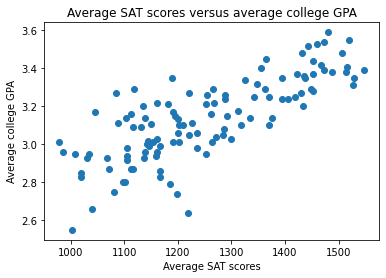

In [87]:
# Create scatterplot of average SAT scores versus average college GPA scores.
plt.scatter(college_merged['sat_ave'],
            college_merged['ave_gpa']);

plt.title("Average SAT scores versus average college GPA")
plt.xlabel("Average SAT scores", fontsize = 10);
plt.ylabel("Average college GPA", fontsize = 10);

The scatterplot above showing average SAT versus college GPA scores showed an upward trend; This means that students with higher SAT also achieved higher GPA scores in college. To further demonstrate this point, a linear regression line will be plotted in the same scatterplot (as shown below).

In [88]:
d = np.polyfit(college_merged['sat_ave'],college_merged['ave_gpa'],1)
f = np.poly1d(d)
# this is inserted in column 4
college_merged.insert(4,'line_sat',f(college_merged['sat_ave']))  

The above creates a linear regression line over the data (without using sklearn.linear_model)
<br> Polyfit in numpy does a least squares polynomial fit over the given data.
<br> The final parameter is the degree of the polynomial. For linear regression, the degree is 1.

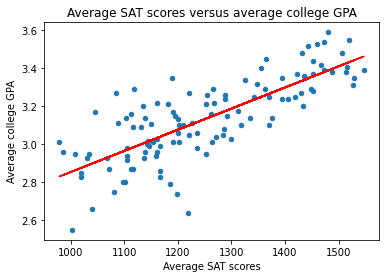

In [89]:
# Create scatterplot and SAT line (determined above) versus GPA on same figure.
ax=college_merged.plot.scatter(x='sat_ave',y='ave_gpa')
college_merged.plot(x='sat_ave',y='line_sat', color='red', legend=False, ax=ax )

plt.title("Average SAT scores versus average college GPA")
plt.xlabel("Average SAT scores", fontsize = 10);
plt.ylabel("Average college GPA", fontsize = 10);

From the figure shown above, this demonstrates a general trend where students with higher average SAT scores during admission, will also have high GPA scores in college. 

In [90]:
d = np.polyfit(college_merged['act_mid'],college_merged['ave_gpa'],1)
f = np.poly1d(d)
# this is inserted in column 5 
college_merged.insert(5,'line_act',f(college_merged['act_mid'])) 

The above creates a linear regression line over the data 
<br> Polyfit in numpy does a least squares polynomial fit over the given data.
<br> The final parameter is the degree of the polynomial. For linear regression the degree is 1.

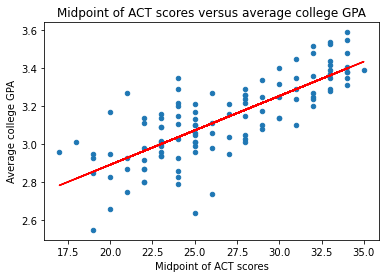

In [91]:
# Create scatterplot and ACT line (determined above) versus GPA on same figure.
ax=college_merged.plot.scatter(x='act_mid',y='ave_gpa')
college_merged.plot(x='act_mid',y='line_act', color='red', legend=False, ax=ax )

plt.title("Midpoint of ACT scores versus average college GPA")
plt.xlabel("Midpoint of ACT scores", fontsize = 10);
plt.ylabel("Average college GPA", fontsize = 10);

From the figure shown above, this demonstrates a general trend where students with higher median ACT scores during admission, will also have high GPA scores in college. 
<br> However, does this imply a good correlation between median ACT scores and college GPA scores?
<br> 

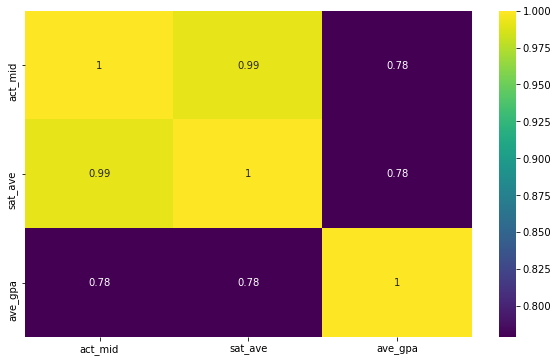

In [92]:
# Quality correlation matrix
# columns are dropped so that it would not be plotted in the corr figure
college_merged = college_merged.drop(columns=['admissions','line_sat','line_act'])

plt.figure(figsize=(10,6))
cx=college_merged.corr()
sns.heatmap(cx, annot=True, cmap = 'viridis')
plt.show()


From the figure shown above, the correlation between median ACT scores and average college GPA scores is 0.76.
<br> The correlation between average SAT scores and average college GPA scores is 0.75.
<br> There is a myth that prestigious colleges, like those in the Ivy League prefer the SAT over the ACT. While many university admissions offices have publicly stated that this is not true, the results shown here also demonstrates that both SAT and ACT scores have similar correlation to college GPA scores. So, both the SAT and ACT do have similar predictive validity, and both can be regarded as similar in predicting academic success in college.


## Conclusions and Recommendations

Admittedly, standardized tests are far from perfect. They cannot capture students' attitudes, such as being punctual to class and turning in assignments. However, getting rid of them altogether is not beneficial to colleges who aims to determine the academic potential of incoming students. Furthermore, there could be a wide variation in grading standards between high schools. 
<br> The results here showed that there is a correlation between SAT scores and college GPA scores. Similarly, there is a correlation between ACT scores and college GPA scores. In addition, both SAT and ACT scores are similar in predicting future academic success in students entering college. 
<br> So, unless there is a better way to predict a college student's success, removing standardised tests such as the SAT and ACT tests will not enable colleges to make better decisions during student admissions.  
